
## L'ANALISI TESTUALE E SENTIMENTALE BASATE SUI DATI ESTRATTI DAL WEB

La vastità di Internet ospita una ricchezza inestimabile di informazioni, spesso richiedendo accesso rapido e efficiente. In tale contesto, il web scraping, una tecnica di estrazione dati da pagine web, si rivela fondamentale per acquisire e sfruttare tali risorse in modo tempestivo e accurato.

In questo Notebook partiremo dall'estrazione dei dati dal web, effettueremo l'analisi sentimentale e l'analisi testuale.

## I. L'Estrazione dei Dati (Web Scraping)

Il Web Scraping rappresenta un processo automatizzato di cattura di dati e contenuti online. In essenza, consiste nell'estrazione di dati web. Questa tecnica è utilizzata per recuperare informazioni, raccogliere dati di notizie, condurre monitoraggi web, effettuare analisi di marketing competitivo, tra altre applicazioni. L'impiego del web scraping semplifica notevolmente l'accesso a un vasto volume di informazioni online, offrendo un metodo più rapido ed efficiente rispetto all'estrazione manuale dei dati dai siti web.


<figure>
    <img src="https://dirittodellinformazione.it/wp-content/uploads/2023/06/61932c032e0a0173df6d2377_What-is-Web-Scraping.jpg" width="650" height="350" >
    <figcaption>Image from https://dirittodellinformazione.it/garante-privacy-stop-al-web-scraping/</figcaption>
</figure>

- I siti di e-commerce utilizzano il web scraping per comprendere le strategie di prezzo e vedere quali prezzi sono fissati dai concorrenti. Gli analisti e i team di ricerca di mercato utilizzano i dati del web scraping per guidare i modelli di prezzo. Questa applicazione è nota come price intelligence. I dati raccolti possono essere utilizzati per prendere decisioni migliori sui prezzi.

- L'analisi del testo delle recensioni e dei commenti dei clienti aiuta anche i siti di e-commerce a guidare la propria strategia e i propri metodi. Tali dati possono anche aiutare a pianificare la strategia di marca delle aziende.




L'applicazione che intendiamo creare avrà come obiettivo il monitoraggio costante dei contenuti online e delle notizie, nonché l'analisi accurata delle emozioni e delle opinioni espresse. Questo verrà ottenuto attraverso un processo di esame approfondito dei siti web e dei materiali informativi, finalizzato a comprendere il sentimento generale, raccogliere punti di vista e rilevare eventi di interesse.







#### 1- Estrazione dei Dati

In [4]:
#!pip install spacy #Fornisce un'API semplice per l'estrazione di informazioni da testi
#!python -m spacy download en_core_web_sm
#!pip install textblob
#!pip install nltk

In [7]:
#!pip install pattern
#import pattern

In [15]:
#Importazione Beautiful Soup e delle librerie per l'analisi di testo

import requests
import re
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment

Adesso procediamo a formulare una richiesta e recuperiamo le informazioni dal sito web.

In [10]:
r=requests.get('https://www.newsy.com/stories/commercial-companies-advance-space-exploration/')
#Impostazione della corretta codifica del testo della pagina HTML
r.encoding = 'utf-8'

In [11]:
#Estraiamo l'HTML dall'oggetto della richiesta
html = r.text

In [13]:
# Stampiamo i primi 100 elementi dell'html
print(html[ :500])

<!DOCTYPE html><html lang="en"><head><!-- Google Analytics: GA4 --><script>var gtCode = 'G-D7R21VYTPB'; // live
                    var gtScriptElement = document.createElement('script')
                    gtScriptElement.src = `https://www.googletagmanager.com/gtag/js?id=${gtCode}&l=GA4DataLayer`;
                    gtScriptElement.onload = OnceLoaded;
                    document.getElementsByTagName('head')[0].appendChild(gtScriptElement);
                    function OnceLoaded() {
       


In [16]:
# Creazione dell'oggetto BeautifulSoup de HTML
soup = BeautifulSoup(html)

# Getting the text out of the soup
text = soup.get_text()

In [18]:
type(text)

str

In [19]:
len(text)

4977

In [20]:
print(text[100:1100])

ePoliticsBusinessScience/HealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWhere to WatchSearchFollow Us






SpaceHow Commercial Companies Are Advancing Space ExplorationThere's competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy Clayton SandellFacebook ShareTweetEmailSMSPosted:  8:00 p.m. EDT Oct 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the 'Starship' lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musk's mission-to-Mars dreams a reality."He says, 'I want to di

Adesso possiamo procedere con la pulizia del testo estratto

In [29]:
# Rimuovi tutti i caratteri non desiderati
clean_text = re.sub(r'[^A-Za-z0-9 ]+', '', text)

# Rimuovi spazi e caratteri di nuova riga extra
clean_text = ' '.join(clean_text.split())

# clean_text= text.replace("n", " ")
# clean_text= clean_text.replace("/", " ")       
# clean_text= ''.join([c for c in clean_text if c != "'"])

In [22]:
clean_text

'Commercial Compa ies Adva ce Space Exploratio \n\n\n\n\nScripps Newswatch livetoggle me uNewsU.S. NewsLifePoliticsBusi essScie ce HealthWorldTechE tertai me tSportsShowsScheduleShow ListDocume tariesI  Real LifeNext LevelBelli gcatAll DocsI vestigatio sAboutTeamViewer SpotlightHotli eSupportWhere to WatchSearchFollow Us\n\n\n\n\n\n\nSpaceHow Commercial Compa ies Are Adva ci g Space Exploratio Theres competitio  amo g roughly a doze  private compa ies to lau ch  ew space statio s.How Commercial Compa ies Are Adva ci g Space Exploratio NASAClayto  Sa dellBy\xa0Clayto  Sa dellFacebook ShareTweetEmailSMSPosted:  8:00 p.m. EDT Oct 29, 2021As astro auts blast off to the I ter atio al Space Statio  this weeke d o  a SpaceX rocket, the compa y is also showi g off a massive ship it says will o e day take travelers far, far away.Newly released video shows the Starship lifti g i to a  aerial ballet of flips a d tur s before la di g agai . SpaceX hopes the ship will reach orbit for the first time

In [30]:
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [31]:
len(sentence)

10

In [32]:
sentence

['Commercial Companies Advance Space ExplorationScripps Newswatch livetoggle menuNewsUS NewsLifePoliticsBusinessScienceHealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWhere to WatchSearchFollow UsSpaceHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stationsHow Commercial Companies Are Advancing Space ExplorationNASAClayton SandellByClayton SandellFacebook ShareTweetEmailSMSPosted 800 pm EDT',
 'Oct 29 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket the company is also showing off a massive ship it says will one day take travelers far far awayNewly released video shows the Starship lifting into an aerial ballet of flips and turns before landing again',
 'SpaceX hopes the ship will reach orbit for the first time next month and maybe one day mak

In [33]:
print(sentence[2])

SpaceX hopes the ship will reach orbit for the first time next month and maybe one day make founder Elon Musks missiontoMars dreams a realityHe says I want to die on Mars just not on impact editor for Spacerefcom Keith Cowing said Ive known Elon forever for like 20 years I met him when he was actually a kid and I was a lot younger with less gray hair So for him to do this doesnt surprise me


#### 2- L'Analisi Sentimentale (Sentiment Analysis) 


L'analisi dei sentimenti permette di valutare le conversazioni tra utenti in un contesto e periodo specifici. In particolare, si concentra sulla valutazione automatica delle emozioni e delle opinioni espresse nei testi online riguardanti un prodotto o altro argomento.

Qui useremo Textblob, una libreria Python che supporta il trattamento dei testi . All'interno di Textblob, sono integrate funzionalità per condurre l'analisi dei sentimenti, che permettono di ottenere valutazioni riguardo la polarità e la soggettività dei testi analizzati.

Il punteggio di polarità può essere positivo o negativo e la soggettività varia tra 0 e 1.
Creieremo un elenco vuoto e otteniamo tutti i dati.

In [34]:
textblob_sentiment=[] # Creazione di una lista vuota in cui verrà stoccati i dati splittati

for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    
    textblob_sentiment.append([s,a,b])

In [36]:
type(b)

float

Ora possiamo trasformare in dataFrame per semplificare l'analisi e il tracciamento.

In [37]:
df_text = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
df_text.head(5)

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.033766,0.218506
1,Oct 29 2021As astronauts blast off to the Inte...,0.050000,0.750000
2,SpaceX hopes the ship will reach orbit for the...,0.016667,0.100000
3,Hes always just been as awed by this stuff as ...,0.132284,0.465093
4,And NASA is sort of not really wanting to go t...,0.050000,0.300000


In [66]:
df_text["Polarity"].unique()

array([0.03376623, 0.05      , 0.01666667, 0.13228438, 0.11666667,
       0.        , 0.22642358, 0.2       ])

In [38]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      10 non-null     object 
 1   Polarity      10 non-null     float64
 2   Subjectivity  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 372.0+ bytes


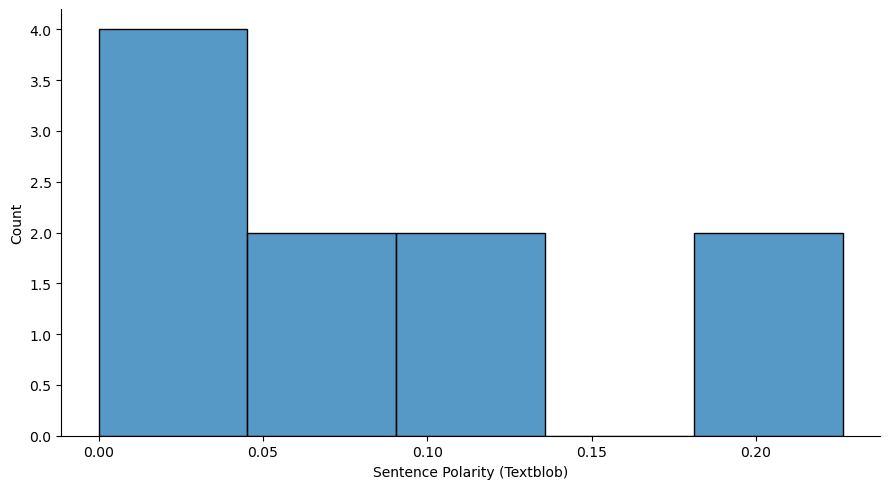

In [40]:
sns.displot(df_text["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)");

Text(0.5, 9.444444444444438, 'Sentence Subjectivity (Textblob)')

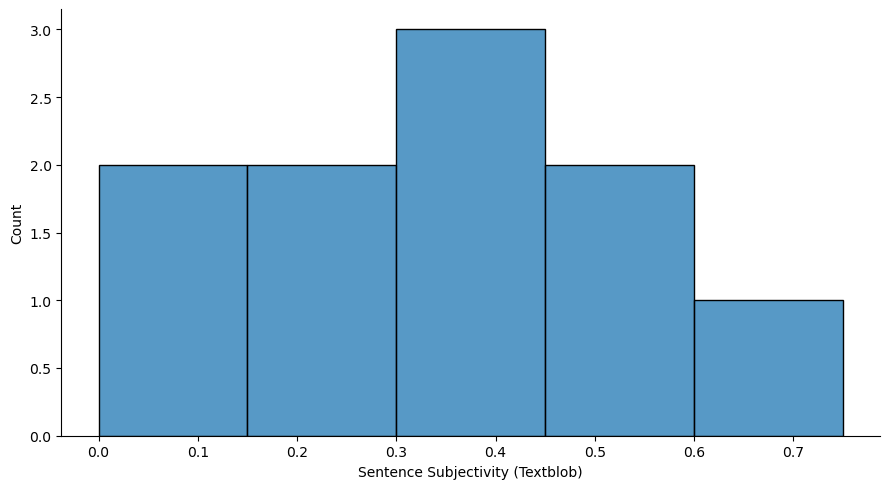

In [42]:
sns.displot(df_text["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

Un modo per eseguire l'analisi del sentiment di un testo in Python è utilizzando la libreria 'pattern'. Questa libreria offre funzioni specializzate per l'elaborazione del linguaggio naturale (PNL) e permette di valutare il sentimento di un testo. Un vantaggio di 'pattern' è che è open source, quindi è possibile utilizzarla liberamente.

Per iniziare, dobbiamo acquisire le frasi di interesse e ottenere i punteggi relativi al sentimento contenuti in esse.

In [43]:
pattern_sentiment=[]

for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    
    pattern_sentiment.append([s,c,d])

In [44]:
pattern_sentiment[0]

['Commercial Companies Advance Space ExplorationScripps Newswatch livetoggle menuNewsUS NewsLifePoliticsBusinessScienceHealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWhere to WatchSearchFollow UsSpaceHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stationsHow Commercial Companies Are Advancing Space ExplorationNASAClayton SandellByClayton SandellFacebook ShareTweetEmailSMSPosted 800 pm EDT',
 0.033766233766233764,
 0.21850649350649354]

In [45]:
# Ora convertiamo i dati in un frame di dati.
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity']) 
df_pattern.head()

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.033766,0.218506
1,Oct 29 2021As astronauts blast off to the Inte...,0.050000,0.750000
2,SpaceX hopes the ship will reach orbit for the...,0.016667,0.100000
3,Hes always just been as awed by this stuff as ...,0.132284,0.465093
4,And NASA is sort of not really wanting to go t...,0.050000,0.300000


Text(0.5, 9.444444444444438, 'Sentence Polarity (Pattern)')

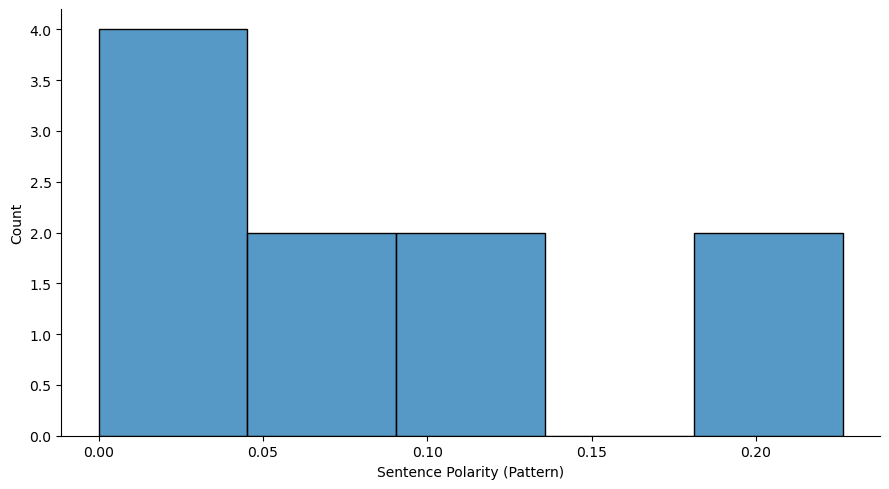

In [46]:
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")

Text(0.5, 9.444444444444438, 'Sentence Subjectivity (Pattern)')

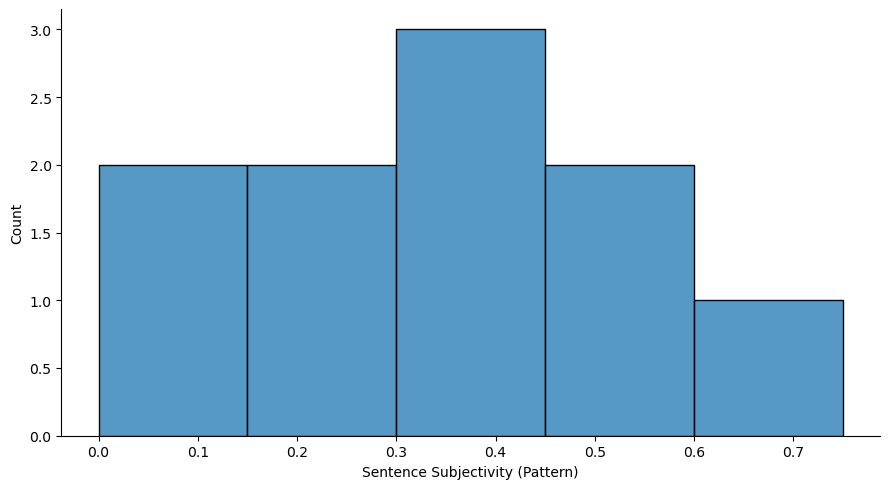

In [47]:
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")

#### 3- Frequenza delle parole e nuvola di parole (Word Cloud)

Un buon modo per comprendere le opinioni e le idee generali contenute nel testo è analizzare la frequenza delle parole e creare una nuvola di parole. Sono ottimi modi per visualizzare il sentimento espresso da un articolo o un blog.

Iniziamo creando il tokenizer NLTK, il tokenizer convertirà il testo in singoli token.

In [48]:
#Creazione del tokenizzatore
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [49]:
#Tokenizzare il testo
tokens = tokenizer.tokenize(clean_text)

In [50]:
len(tokens)

757

In [51]:
print(tokens[0:15])

['Commercial', 'Companies', 'Advance', 'Space', 'ExplorationScripps', 'Newswatch', 'livetoggle', 'menuNewsUS', 'NewsLifePoliticsBusinessScienceHealthWorldTechEntertainmentSportsShowsScheduleShow', 'ListDocumentariesIn', 'Real', 'LifeNext', 'LevelBellingcatAll', 'DocsInvestigationsAboutTeamViewer', 'SpotlightHotlineSupportWhere']


In [52]:
# convertiamo tutto il contenuto dei tokens in minuscolo 
words = []
for word in tokens:
    words.append(word.lower())

In [57]:
words

['commercial',
 'companies',
 'advance',
 'space',
 'explorationscripps',
 'newswatch',
 'livetoggle',
 'menunewsus',
 'newslifepoliticsbusinesssciencehealthworldtechentertainmentsportsshowsscheduleshow',
 'listdocumentariesin',
 'real',
 'lifenext',
 'levelbellingcatall',
 'docsinvestigationsaboutteamviewer',
 'spotlighthotlinesupportwhere',
 'to',
 'watchsearchfollow',
 'usspacehow',
 'commercial',
 'companies',
 'are',
 'advancing',
 'space',
 'explorationtheres',
 'competition',
 'among',
 'roughly',
 'a',
 'dozen',
 'private',
 'companies',
 'to',
 'launch',
 'new',
 'space',
 'stationshow',
 'commercial',
 'companies',
 'are',
 'advancing',
 'space',
 'explorationnasaclayton',
 'sandellbyclayton',
 'sandellfacebook',
 'sharetweetemailsmsposted',
 '800',
 'pm',
 'edt',
 'oct',
 '29',
 '2021as',
 'astronauts',
 'blast',
 'off',
 'to',
 'the',
 'international',
 'space',
 'station',
 'this',
 'weekend',
 'on',
 'a',
 'spacex',
 'rocket',
 'the',
 'company',
 'is',
 'also',
 'showing

Ora dobbiamo rimuovere le stopword
Le parole #stop sono un insieme di parole comunemente usate in qualsiasi lingua.
Ad esempio, in inglese, “the”, “is” e “and” si qualificano facilmente come parole stop.
Nelle applicazioni dell'NLP e di text mining, le stopword vengono utilizzate per eliminare parole non importanti in modo da
consentire all'applicazione di concentrarsi sulle parole importanti.


In [54]:
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [58]:
print(words[0:15])

['commercial', 'companies', 'advance', 'space', 'explorationscripps', 'newswatch', 'livetoggle', 'menunewsus', 'newslifepoliticsbusinesssciencehealthworldtechentertainmentsportsshowsscheduleshow', 'listdocumentariesin', 'real', 'lifenext', 'levelbellingcatall', 'docsinvestigationsaboutteamviewer', 'spotlighthotlinesupportwhere']


In [59]:
# distribuzione di frequenza delle parole
freq_dist = nltk.FreqDist(words_new)

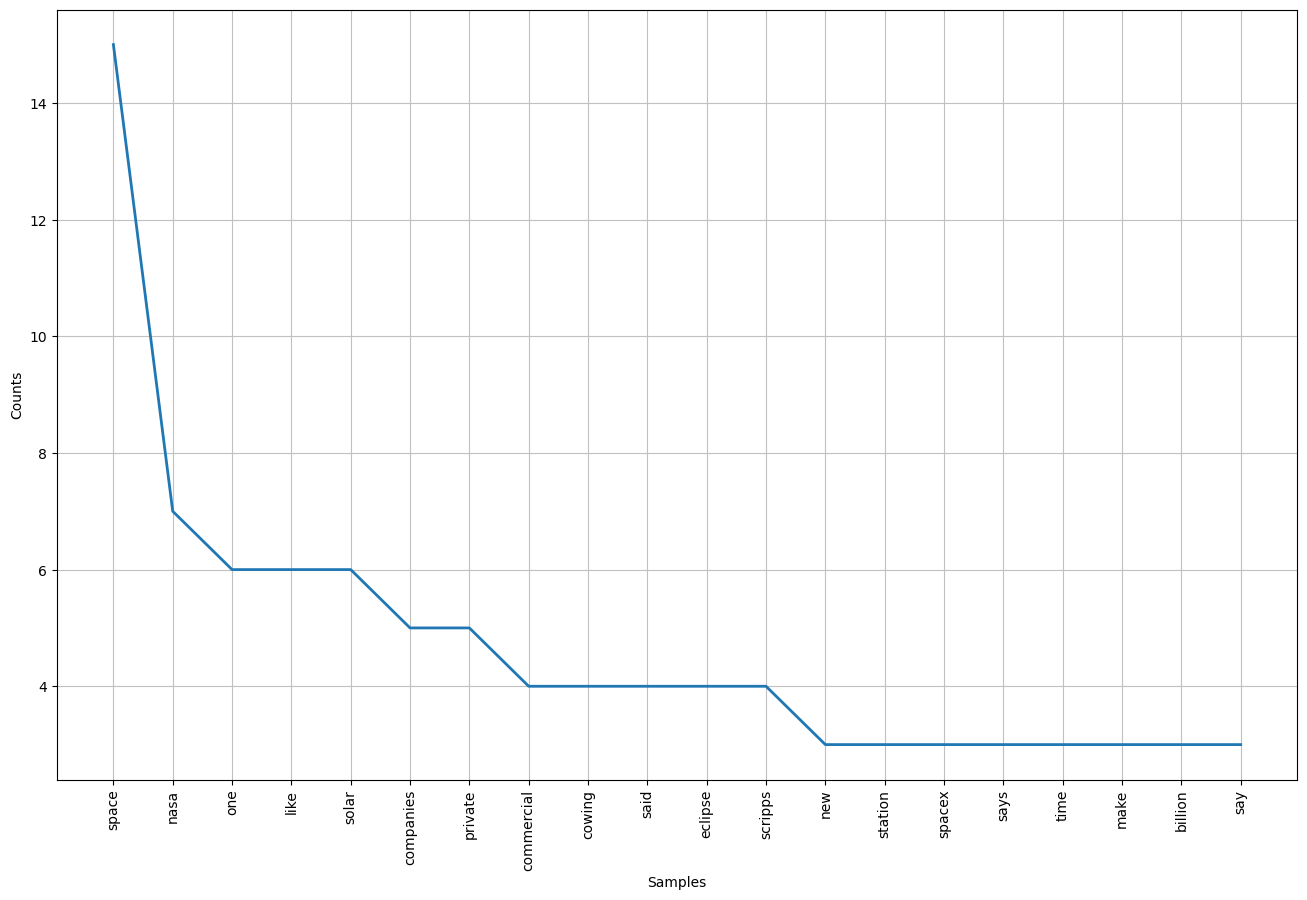

In [60]:
plt.subplots(figsize=(16,10))
freq_dist.plot(20);

In [61]:
# conversione in stringa
res=' '.join([i for i in words_new if not i.isdigit()])

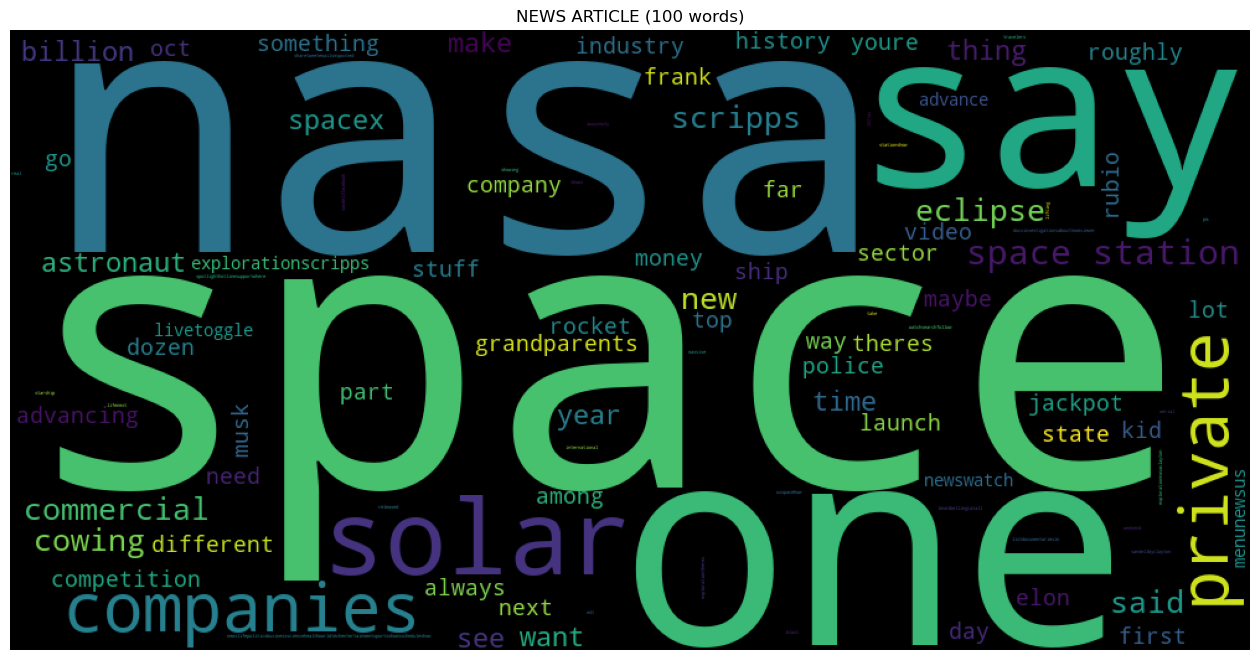

In [65]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1000,
                          height=500
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

#### Conclusion

In questo modo, grazie all'utilizzo del web scraping, è possibile estrarre informazioni da un sito web e utilizzare i dati testuali per eseguire l'analisi del sentiment. Questo processo è semplice e diretto. Il web scraping combinato con l'NLP offre numerose applicazioni. La vasta quantità di dati testuali a nostra disposizione offre un potenziale immenso. Utilizzando metodi appropriati, questi dati possono essere impiegati per prendere decisioni basate sui dati.